# Pump it Up: Data Mining the Water Table

### Can you predict which water pumps are faulty?

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

`amount_tsh` - Total static head (amount water available to waterpoint)  
`date_recorded` - The date the row was entered  
`funder` - Who funded the well  
`gps_height` - Altitude of the well  
`installer` - Organization that installed the well  
`longitude` - GPS coordinate  
`latitude` - GPS coordinate  
`wpt_name` - Name of the waterpoint if there is one  
`num_private` -  
`basin` - Geographic water basin  
`subvillage` - Geographic location  
`region` - Geographic location  
`region_code` - Geographic location (coded)  
`district_code` - Geographic location (coded)  
`lga` - Geographic location  
`ward` - Geographic location  
`population` - Population around the well  
`public_meeting` - True/False  
`recorded_by` - Group entering this row of data  
`scheme_management` - Who operates the waterpoint  
`scheme_name` - Who operates the waterpoint  
`permit` - If the waterpoint is permitted  
`construction_year` - Year the waterpoint was constructed  
`extraction_type` - The kind of extraction the waterpoint uses  
`extraction_type_group` - The kind of extraction the waterpoint uses  
`extraction_type_class` - The kind of extraction the waterpoint uses  
`management` - How the waterpoint is managed  
`management_group` - How the waterpoint is managed  
`payment` - What the water costs  
`payment_type` - What the water costs  
`water_quality` - The quality of the water  
`quality_group` - The quality of the water  
`quantity` - The quantity of water  
`quantity_group` - The quantity of water  
`source` - The source of the water  
`source_type` - The source of the water  
`source_class` - The source of the water  
`waterpoint_type` - The kind of waterpoint  
`waterpoint_type_group` - The kind of waterpoint  

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load Data

In [2]:
df_train = pd.read_csv('./dataset/training_set_values.csv')
df_labels = pd.read_csv('./dataset/training_set_labels.csv')
df_test = pd.read_csv('./dataset/test_set_values.csv')
submission = pd.read_csv('./dataset/submission_format.csv')

In [3]:
data = pd.merge(df_train, df_labels, on='id')

In [4]:
df_all = df_train.append(df_test)

In [5]:
df_all.shape

(74250, 40)

# EDA

In [6]:
data.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
df_all.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
# prof = pandas_profiling.ProfileReport(data)
# prof.to_file(output_file='eda_output.html')

In [9]:
df_all.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [10]:
# Get names of columns with missing values
cols_with_missing = [col for col in df_all.columns
                     if df_all[col].isnull().any()]

print(cols_with_missing)

['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


In [11]:
# Correlation among Features
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)  
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [12]:
label_value_counts = data['status_group'].value_counts()
label_value_counts

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Imbalance data set

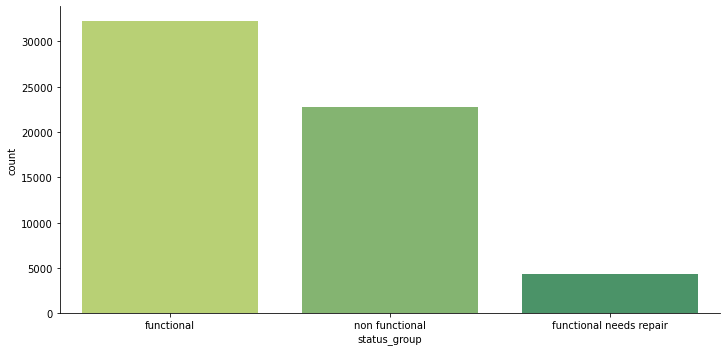

In [13]:
sns.catplot('status_group', data=data, aspect=2, kind='count', palette=("summer_r"));

In [14]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in df_all.columns if df_all[cname].nunique() < 10 and 
                        df_all[cname].dtype == "object"]

print(low_cardinality_cols)

['basin', 'public_meeting', 'recorded_by', 'permit', 'extraction_type_class', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [15]:
# Select numeric columns
numeric_cols = [cname for cname in df_all.columns if df_all[cname].dtype in ['int64', 'float64']]

print(numeric_cols)

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


### For Visualization

In [16]:
def crosstab_plot_norm(selection, data):
    pd.crosstab(
        selection, 
        data.status_group, 
        normalize="index").plot.bar(stacked=True, figsize=(15,5));  

In [17]:
def distplot(data):
    sns.distplot(data);

## Preprocessing and Cleaning

### `amount_tsh`

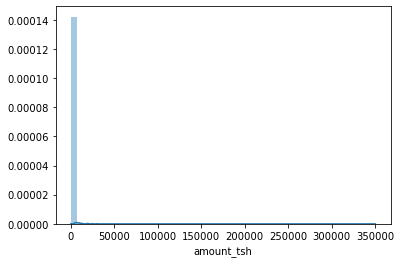

In [18]:
distplot(df_all.amount_tsh)

### `subvillage`             

In [19]:
df_all.subvillage.value_counts()[:15]

Shuleni       646
Majengo       631
Madukani      629
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Songambele    194
Mlimani       190
Miembeni      168
Msikitini     164
1             157
Kanisani      146
Name: subvillage, dtype: int64

In [20]:
len(df_all.subvillage.unique())

21426

In [21]:
df_all.subvillage.isna().sum()

470

`HIGH CARDINALITY`

`subvillage` feature should be dropped   

### `date_recorded`

In [22]:
df_all.date_recorded.value_counts()

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
             ... 
2004-02-01      1
2011-09-01      1
2011-09-15      1
2004-01-09      1
2012-01-25      1
Name: date_recorded, Length: 369, dtype: int64

Creating a new features `year_recorded` and `month_recorded`

In [23]:
df_all['date_recorded'] = pd.to_datetime(df_all["date_recorded"])

In [24]:
df_all["year_recorded"] = df_all["date_recorded"].dt.year
df_all["month_recorded"] = df_all["date_recorded"].dt.month

In [25]:
df_all['year_recorded'].value_counts()

2011    35908
2013    30210
2012     8089
2004       41
2002        1
2001        1
Name: year_recorded, dtype: int64

In [26]:
df_all['month_recorded'].value_counts()

3     22423
2     15481
7      8664
1      7903
10     6908
4      4976
8      4181
11     1683
12      771
6       464
5       403
9       393
Name: month_recorded, dtype: int64

In [27]:
df_all.year_recorded.replace('2001', '2011', inplace=True)
df_all.year_recorded.replace('2002', '2012', inplace=True)

In [28]:
df_all['year_recorded'].value_counts()

2011    35908
2013    30210
2012     8089
2004       41
2002        1
2001        1
Name: year_recorded, dtype: int64

`date_recorded` feature should be dropped

### `longitude` and `latitude`

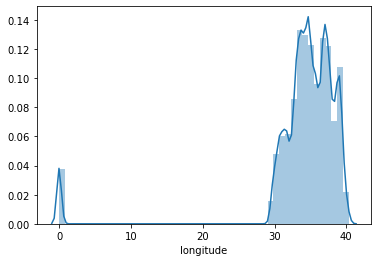

In [29]:
distplot(df_all.longitude)

`0` is not possible in tanzania

In [30]:
df_all.loc[df_all.longitude == 0, 'longitude'] = np.nan
df_all.longitude.isnull().sum()

2269

In [31]:
df_all.longitude.fillna(df_all.longitude.median(), inplace=True)
df_all.longitude.isnull().sum()

0

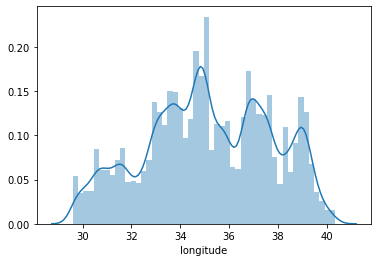

In [32]:
distplot(df_all.longitude)

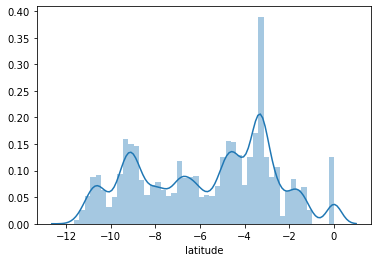

In [33]:
distplot(df_all.latitude)

In [34]:
df_all.loc[df_all.latitude == 0, 'latitude'] = np.nan
df_all.latitude.isnull().sum()

0

### `gps_height`

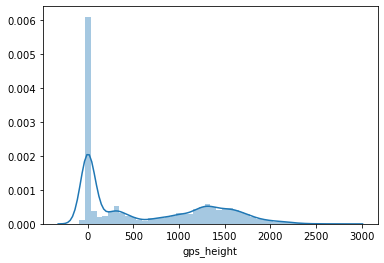

In [35]:
distplot(df_all.gps_height)

In [36]:
df_all.loc[df_all.gps_height == 0, 'gps_height'] = np.nan
df_all.gps_height.isnull().sum()

25649

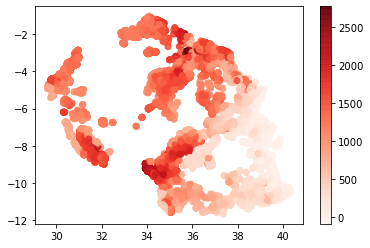

In [37]:
plt.scatter(df_all['longitude'], 
            df_all['latitude'], 
            alpha = .8, 
            c = df_all['gps_height'], 
            cmap = 'Reds')

plt.colorbar()
plt.show()

### `installer`

In [38]:
df_all.installer.value_counts()

DWE                           21751
Government                     2282
RWE                            1498
Commu                          1347
DANIDA                         1305
                              ...  
CHURC                             1
TACKLE                            1
MKONGO BUILDING CONTRACTOR        1
Regwa                             1
Othodox church                    1
Name: installer, Length: 2410, dtype: int64

In [39]:
df_all.installer.isnull().sum()

4532

In [40]:
#Fill missing values
df_all.installer.fillna('Other', inplace=True)
df_all.loc[df_all.installer.str.len() == 1, 'installer'] = 'Other'

df_all.installer.isnull().sum()

0

In [41]:
df_all.installer.value_counts()[:10]

DWE           21751
Other          5689
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
TCRS            887
CES             765
Name: installer, dtype: int64

### `wpt_name`

In [42]:
df_all.wpt_name.value_counts()

none               4440
Shuleni            2183
Zahanati           1034
Msikitini           647
Kanisani            390
                   ... 
Mrukatiro A           1
Kwagumbo              1
Kwa Sala Kakobe       1
Daud Yoram            1
Nyamakanka            1
Name: wpt_name, Length: 45684, dtype: int64

`45684` Different values. `wpt_name` should be droped

### `num_private`

C:\Users\KAVINDA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


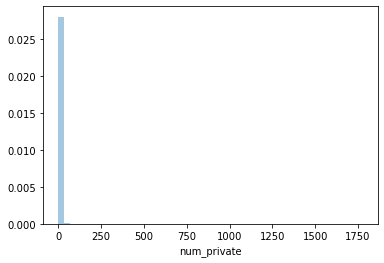

In [43]:
distplot(df_all.num_private)

In [44]:
df_all.num_private.value_counts()

0      73299
1         94
6         92
5         60
8         58
       ...  
30         1
669        1
668        1
213        1
62         1
Name: num_private, Length: 68, dtype: int64

Too many `Zero` values and `skewed`

`num_private` should be droped

### `basin`

In [45]:
df_all.basin.value_counts()

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

In [46]:
df_all.basin.unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

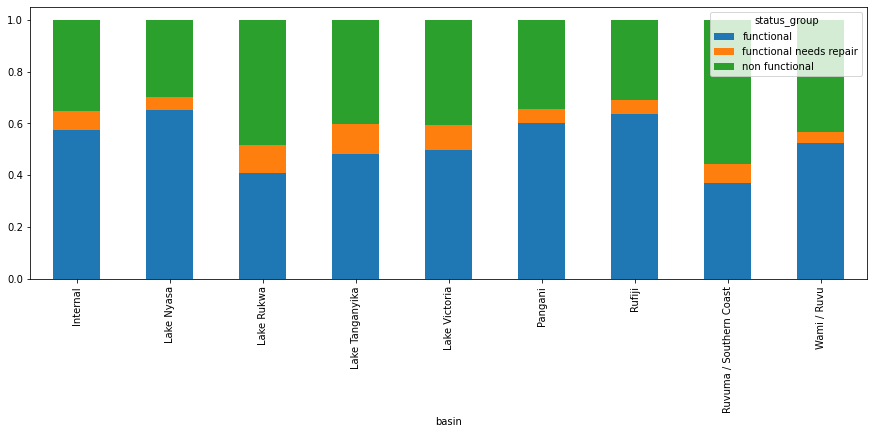

In [47]:
basin_selection = data[data.basin.isin(list(data.basin.value_counts()[:15].keys()))]
crosstab_plot_norm(basin_selection.basin, data)

### `region`

In [48]:
df_all.region.value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

### `region_code`

In [49]:
df_all.region_code.value_counts()[:10]

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
Name: region_code, dtype: int64

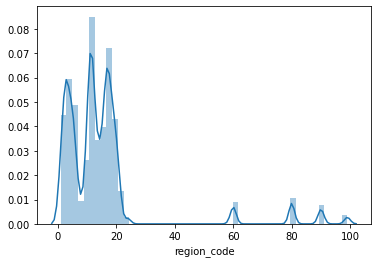

In [50]:
distplot(df_all.region_code)

In [51]:
df_all.groupby(['region', 'region_code']).size()[:10]

region         region_code
Arusha         2              3709
               24              402
Dar es Salaam  7              1020
Dodoma         1              2779
Iringa         11             6599
Kagera         18             4174
Kigoma         16             3533
Kilimanjaro    3              5494
Lindi          8               375
               18                9
dtype: int64

`region` can be dropped because `region_code` is more informative

### `district_code`

In [52]:
df_all.district_code.value_counts()[:10]

1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
Name: district_code, dtype: int64

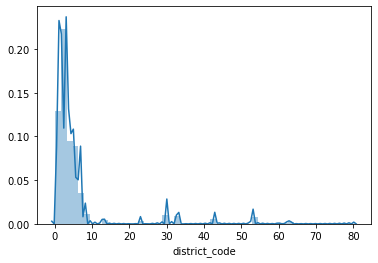

In [53]:
distplot(df_all.district_code)

### `scheme_management `

In [54]:
df_all.scheme_management.value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [55]:
df_all.scheme_management.isnull().sum()

4846

In [56]:
#Fill missing values
df_all.scheme_management.fillna('Other', inplace=True)
df_all.scheme_management.isnull().sum()

0

### `scheme_name`

In [57]:
df_all.scheme_name.value_counts()

K                        858
None                     794
Borehole                 704
Chalinze wate            501
M                        490
                        ... 
Marine Park /Village       1
Kisamisi water scheme      1
Ntang'whale                1
Old mkuu water supply      1
BL K puchini Sisters       1
Name: scheme_name, Length: 2868, dtype: int64

In [58]:
df_all.scheme_name.isnull().sum()

35258

### `permit`

In [59]:
df_all.permit.value_counts()

True     48606
False    21851
Name: permit, dtype: int64

In [60]:
df_all.permit.isnull().sum()

3793

In [61]:
#Fill missing values
df_all.permit.fillna(False, inplace=True)
df_all.permit.isnull().sum()

0

In [62]:
df_all.permit.value_counts()

True     48606
False    25644
Name: permit, dtype: int64

### `public_meeting`

In [63]:
df_all.public_meeting.value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [64]:
df_all.public_meeting.isnull().sum()

4155

### `construction_year`

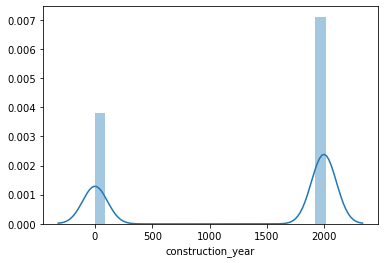

In [65]:
distplot(df_all.construction_year)

In [66]:
df_all.construction_year.value_counts()[:10]

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
Name: construction_year, dtype: int64

In [67]:
#Missing values
df_all.construction_year.replace(0, np.nan, inplace=True)
df_all.construction_year.isnull().sum()

25969

In [68]:
#Fill missing values
df_all.construction_year.fillna(df_all.groupby('subvillage')['construction_year'].transform('median'), inplace=True)
df_all.construction_year.fillna(df_all.groupby('ward')['construction_year'].transform('median'), inplace=True)
df_all.construction_year.fillna(df_all.groupby('lga')['construction_year'].transform('median'), inplace=True)
df_all.construction_year.fillna(df_all.groupby('region_code')['construction_year'].transform('median'), inplace=True)
df_all.construction_year.isnull().sum()

0

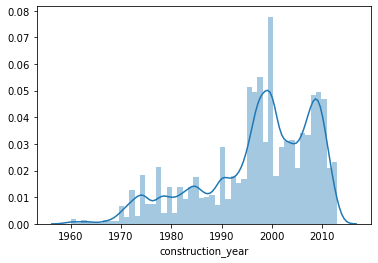

In [69]:
distplot(df_all.construction_year)

### `funder`

In [70]:
df_all.funder.value_counts()[:15]

Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
0                           980
Norad                       949
Name: funder, dtype: int64

In [71]:
# Missing values
pd.isnull(df_all.funder).sum()

4504

In [72]:
# Zero Values
len(df_all.funder[df_all.funder == "0"])

980

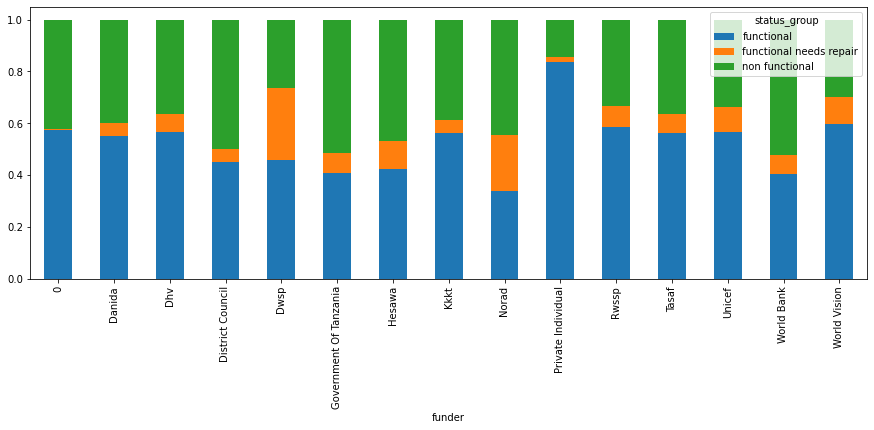

In [73]:
funder_selection = data[data.funder.isin(list(data.funder.value_counts()[:15].keys()))]
crosstab_plot_norm(funder_selection.funder, data)

In [74]:
#Fill missing values
df_all.funder.fillna('Other', inplace=True)
df_all.loc[df_all.funder.str.len() == 1, 'funder'] = 'Other'

In [75]:
# Missing values
pd.isnull(df_all.funder).sum()

0

In [76]:
# Zero Values
len(df_all.funder[df_all.funder == "0"])

0

In [77]:
df_all.funder.value_counts()[:15]

Government Of Tanzania    11299
Other                      5684
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Name: funder, dtype: int64

### `quantity`

In [78]:
df_all.quantity.value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

### `source_type`

In [79]:
df_all.source_type.value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

### `source`

In [80]:
df_all.source.value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

### `source_class`

In [81]:
df_all.source_class.value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [82]:
# Get names of columns with missing values
cols_with_missing = [col for col in df_all.columns
                     if df_all[col].isnull().any()]

print(cols_with_missing)

['gps_height', 'subvillage', 'public_meeting', 'scheme_name']


## Feature Selection

#### Drop Columns

In [83]:
# drop_cols =['id','amount_tsh','date_recorded','subvillage',
#             'wpt_name','num_private','region','district_code',
#             'scheme_name','lga','ward', 'recorded_by','permit',
#             'extraction_type','extraction_type_group','payment',
#             'quality_group','quantity_group','source_type',
#             'waterpoint_type_group','public_meeting','population',
#             'gps_height']

drop_cols =['id','amount_tsh','date_recorded','subvillage',
            'wpt_name','num_private','region','district_code',
            'scheme_name','lga','ward', 'recorded_by',
            'extraction_type','extraction_type_group','payment',
            'quality_group','quantity_group','source_type',
            'waterpoint_type_group','public_meeting','population',
            'gps_height']


In [84]:
df_all = df_all.drop(drop_cols, axis=1)

In [85]:
cat_cols = [cname for cname in df_all.columns if df_all[cname].dtype == "object"]

In [86]:
cat_cols

['funder',
 'installer',
 'basin',
 'scheme_management',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

#### Label Encoding Categorical Columns

In [87]:
for i in cat_cols:
    le = LabelEncoder()
    df_all[i] = le.fit_transform(df_all[i])

In [88]:
df_all.head(5)

,funder,installer,longitude,latitude,basin,region_code,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,year_recorded,month_recorded
0,1538,1695,34.938093,-9.856322,1,11,7,False,1999.0,0,7,4,0,6,1,8,0,1,2011,3
1,518,605,34.698766,-2.147466,4,20,2,True,2010.0,0,11,4,2,6,2,5,1,1,2013,3
2,917,2281,37.460664,-3.821329,5,21,7,True,2009.0,0,7,4,5,6,1,0,1,2,2013,2
3,1949,2065,38.486161,-11.155298,7,90,7,True,1986.0,5,7,4,2,6,0,3,0,2,2013,1
4,19,131,31.130847,-1.825359,4,18,2,True,1997.0,0,1,1,2,6,3,5,1,1,2011,7


In [89]:
df_all.shape

(74250, 20)

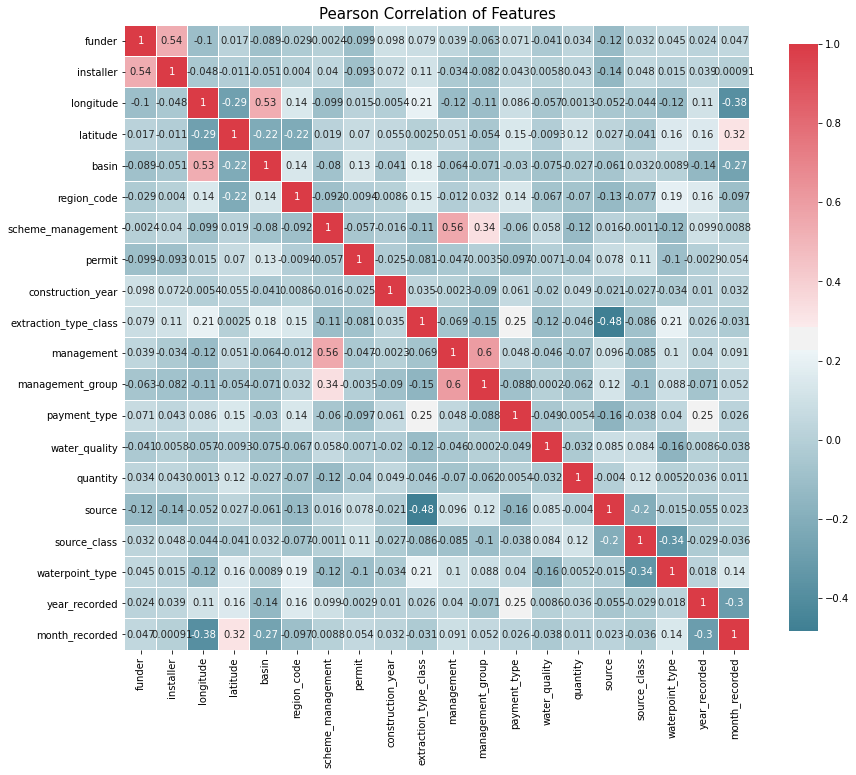

In [90]:
correlation_heatmap(df_all)

# Model Selection

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [92]:
# Splitting train and test
train_data = df_all[0:len(df_train)]
test_data = df_all[len(df_train):]
train_labels = df_labels.drop(['id'], axis=1)
train_labels = pd.factorize(train_labels.status_group)[0] #label encode status_group

In [93]:
# Break off validation set from training data
SEED = 0
TEST_SIZE = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size=TEST_SIZE, random_state=SEED)

## 1. XGBoost

In [94]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

### Hyperparameter Tuning

In [95]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='merror')

In [96]:
param_dist = dict(random_state=[0, 1, 2],
                  n_estimators=[50, 75, 100],
                  max_depth=[10, 15, 20],
                  learning_rate=[0.1, 0.2, 0.3])

param_dist_2 = dict(random_state=[0, 1, 2],
                  n_estimators=[50, 100, 200],
                  max_depth=[10, 15, 20],
                  learning_rate=[0.1, 0.2, 0.3])

In [97]:
# cv = RandomizedSearchCV(xgb, param_dist, verbose = 2)
# cv.fit(X_train, y_train)
# print("Best parameters:", cv.best_params_)
# print("Best score:", cv.best_score_.round(6))

In [98]:
xgb_model = XGBClassifier(
    random_state=0,
    n_estimators=50,
    learning_rate=0.2,
    max_depth=15,
    use_label_encoder=False, 
    eval_metric='merror',
    verbosity=1)

In [99]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

### Feature Importance

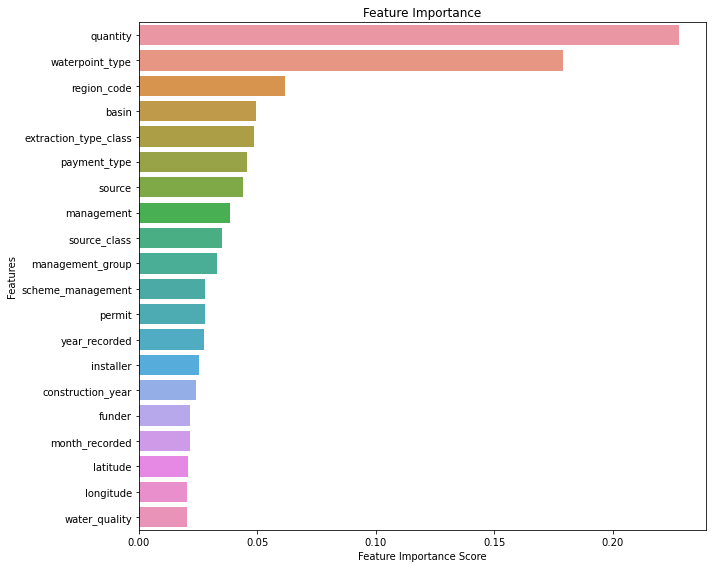

In [100]:
feature_imp = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()

In [101]:
acc_xgb = round(xgb_model.score(X_train, y_train) * 100, 2)
acc_xgb

94.59

In [102]:
y_pred = xgb_model.predict(X_valid)

### Confusion Matrix

In [103]:
confusion_matrix(y_valid,y_pred)

array([[5801,  502,  141],
       [1003, 3495,   71],
       [ 445,  133,  289]], dtype=int64)

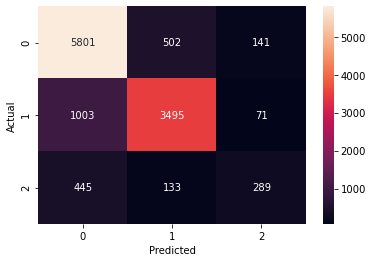

In [104]:
sns.heatmap(confusion_matrix(y_valid,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [105]:
print(classification_report(y_valid, y_pred ))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6444
           1       0.85      0.76      0.80      4569
           2       0.58      0.33      0.42       867

    accuracy                           0.81     11880
   macro avg       0.74      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



In [106]:
round(accuracy_score(y_valid, y_pred) * 100, 2)

80.68

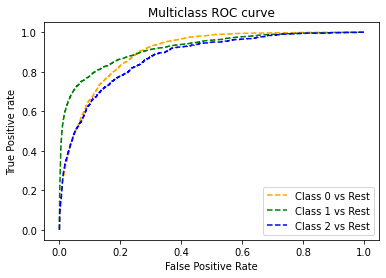

In [107]:
pred_prob = xgb_model.predict_proba(X_valid)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, pred_prob[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [108]:
roc_auc_score(y_valid, pred_prob, multi_class='ovr', average='weighted')

0.9062265393878068

### Cross Validation Score

In [109]:
score = cross_val_score(xgb_model, train_data, train_labels, scoring='accuracy', cv=5).mean()
print('5 fold cross-validation score:', score.round(4))

5 fold cross-validation score: 0.805


In [110]:
# Best CV Score 0.8061

### Prediction

In [111]:
pred = pd.DataFrame(xgb_model.predict(test_data))
pred.loc[pred[0] == 0] = 'functional'
pred.loc[pred[0] == 1] = 'non functional'
pred.loc[pred[0] == 2] = 'functional needs repair'

In [112]:
pred.head()

,0
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [113]:
pred.tail()

,0
14845,non functional
14846,functional
14847,functional
14848,functional
14849,non functional


### Submission

In [114]:
print('Creating Submission File: ', end="", flush=True)
submission = pd.concat([df_test['id'], pred], axis=1)
submission.columns = ('id', 'status_group')
submission.to_csv('xgb_submission_14.csv', header=True, index=False)
print('Completed')

Creating Submission File: Completed
